<a href="https://colab.research.google.com/github/NithyaPKiran/Assignments/blob/main/Assignment_14_Decision_Tree_1_Company_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [37]:
co = pd.read_csv('Company_Data.csv')
co

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [38]:
co.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [70]:
co.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
ShelveLoc,400.0,1.307500,0.833475,0.0,1.00,2.00,2.00,2.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [41]:
label_encoder = preprocessing.LabelEncoder()
co['ShelveLoc']= label_encoder.fit_transform(co['ShelveLoc'])

In [42]:
x=co.iloc[:,0:4]
y=co['ShelveLoc']

In [43]:
x
pd.set_option("display.max_rows", None)
x

,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
5,10.81,124,113,13
6,6.63,115,105,0
7,11.85,136,81,15
8,6.54,132,110,0
9,4.69,132,113,0


In [44]:
y

0      0
1      1
2      2
3      2
4      0
5      0
6      2
7      1
8      2
9      2
10     0
11     1
12     2
13     1
14     1
15     2
16     1
17     1
18     1
19     2
20     2
21     1
22     2
23     2
24     0
25     1
26     1
27     2
28     0
29     0
30     1
31     2
32     1
33     1
34     2
35     2
36     1
37     2
38     2
39     0
40     0
41     0
42     2
43     2
44     2
45     0
46     2
47     0
48     0
49     1
50     0
51     0
52     0
53     2
54     2
55     2
56     2
57     0
58     0
59     2
60     0
61     2
62     0
63     2
64     2
65     2
66     2
67     2
68     1
69     2
70     1
71     2
72     2
73     1
74     2
75     0
76     2
77     2
78     2
79     0
80     0
81     1
82     1
83     0
84     0
85     2
86     2
87     1
88     2
89     2
90     2
91     2
92     2
93     2
94     0
95     2
96     1
97     0
98     1
99     0
100    2
101    2
102    2
103    0
104    2
105    2
106    2
107    2
108    0
109    2
110    2
1

In [45]:
co['ShelveLoc'].unique()

array([0, 1, 2])

In [46]:
co.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [47]:
colnames = list(co.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [48]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

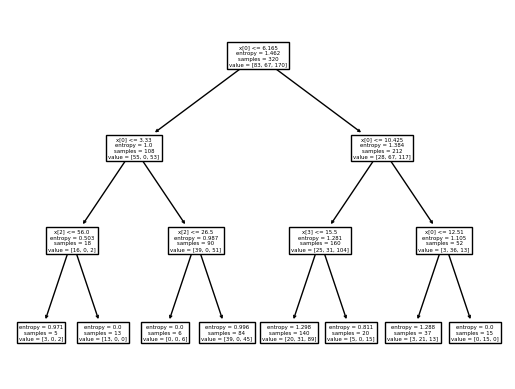

In [50]:
#PLot the decision tree
tree.plot_tree(model);
plt.show()

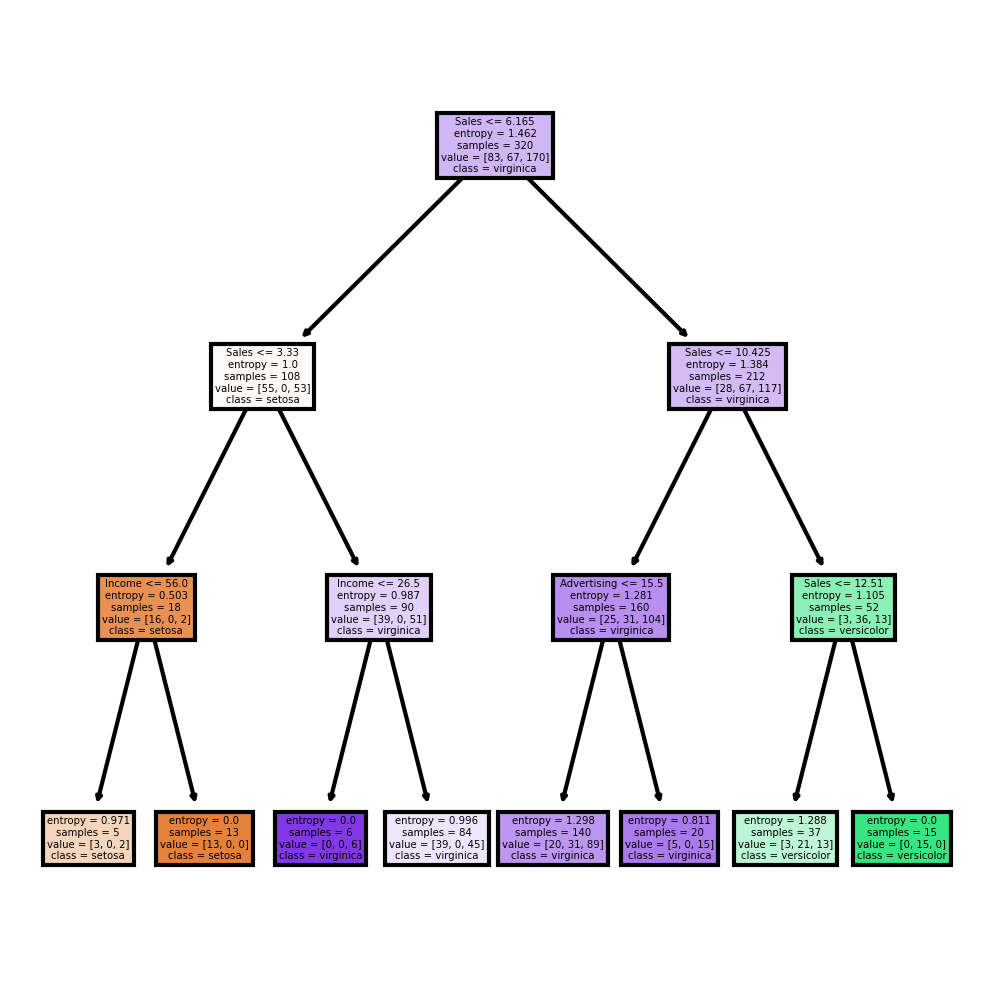

In [51]:
fn=['Sales','CompPrice','Income','Advertising']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [52]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_0 <= 6.16
|   |--- feature_0 <= 3.33
|   |   |--- feature_2 <= 56.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  56.00
|   |   |   |--- class: 0
|   |--- feature_0 >  3.33
|   |   |--- feature_2 <= 26.50
|   |   |   |--- class: 2
|   |   |--- feature_2 >  26.50
|   |   |   |--- class: 2
|--- feature_0 >  6.16
|   |--- feature_0 <= 10.42
|   |   |--- feature_3 <= 15.50
|   |   |   |--- class: 2
|   |   |--- feature_3 >  15.50
|   |   |   |--- class: 2
|   |--- feature_0 >  10.42
|   |   |--- feature_0 <= 12.51
|   |   |   |--- class: 1
|   |   |--- feature_0 >  12.51
|   |   |   |--- class: 1



In [53]:
model.feature_importances_

array([0.87752091, 0.        , 0.06997425, 0.05250485])

In [54]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Sales          0.877521
Income         0.069974
Advertising    0.052505
CompPrice      0.000000
dtype: float64

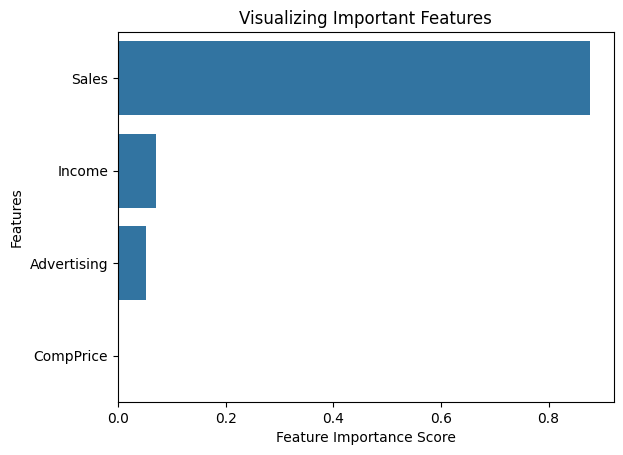

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [56]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    63
1    13
0     4
dtype: int64

In [57]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [58]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [59]:
# Accuracy
np.mean(preds==y_test)

0.625

In [60]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [61]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

In [63]:
model.feature_importances_

array([0.87752091, 0.        , 0.06997425, 0.05250485])

In [64]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [65]:
array = co.values
X = array[:,0:3]
y = array[:,3]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [68]:
#Find the testing accuracy
model.score(X_test,y_test)

-0.08140301003067263

In [69]:
#Find the training accuracy
model.score(X_train, y_train)

0.23768998912365258